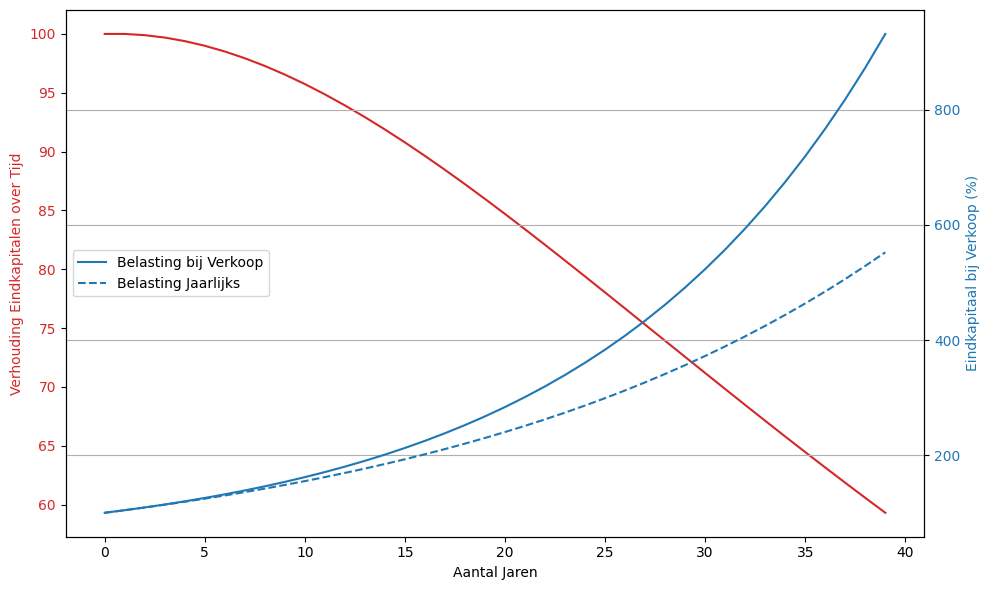

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def percentage_bij_verkoop(jaar, rendement, belasting):
    """Betaal de belasting bij verkoop over het rendement."""
    r = rendement / 100
    t = belasting / 100
    totaal = (1 + r) ** jaar
    tax = (totaal - 1) * t
    return totaal - tax


def percentage_jaarlijks(jaar, rendement, belasting):
    """Betaal de belasting jaarlijks over het rendement."""
    r = rendement / 100
    t = belasting / 100

    return ((1 + r) - (r * t)) ** jaar


def verhouding(jaar, rendement, belasting):
    """Bereken de verhouding tussen de eindkapitalen."""
    a = percentage_jaarlijks(jaar, rendement, belasting)
    b = percentage_bij_verkoop(jaar, rendement, belasting)
    return 100 * a / b


jaren = np.arange(0, 40)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:red"
ax1.set_xlabel("Aantal Jaren")
ax1.set_ylabel("Verhouding Eindkapitalen over Tijd", color=color)
ax1.plot(
    jaren,
    [verhouding(jaar, 7, 36) for jaar in jaren],
    color=color,
    label="Verhouding Eindkapitalen (%)",
)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("Eindkapitaal bij Verkoop (%)", color=color)
ax2.plot(
    jaren,
    [100 * percentage_bij_verkoop(jaar, 7, 36) for jaar in jaren],
    color=color,
    label="Belasting bij Verkoop",
)
ax2.plot(
    jaren,
    [100 * percentage_jaarlijks(jaar, 7, 36) for jaar in jaren],
    color=color,
    label="Belasting Jaarlijks",
    ls="--",
)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.grid()
plt.legend(loc="center left")
plt.show()